# Churn prediction

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
import category_encoders as ce
from category_encoders import TargetEncoder

# For performing train/test/split
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# import all the models
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

# For computing accuracy score
from sklearn.metrics import accuracy_score, auc, roc_curve,f1_score,precision_score,precision_recall_curve, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics

### Read Dataset

In [2]:
dataset = pd.read_csv('dataset-workshop2.csv')

In [3]:
dataset.shape

(4250, 20)

In [4]:
display(dataset.head(10))
display(dataset.tail(5))

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   
5    MO             147  area_code_415                yes              no   
6    LA             117  area_code_408                 no              no   
7    WV             141  area_code_415                yes             yes   
8    IN              65  area_code_415                 no              no   
9    RI              74  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   
5                      0              157.0               79   
6                      0              184.5               97   
7                     37              258.6               84   
8                      0              129.1              137   
9                      0              187.7              127   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   
5             26.69              103.1               94              8.76   
6             31.37              351.6               80             29.89   
7             43.96              222.0              111             18.87   
8             21.95              228.5               83             19.42   
9             31.91              163.4              148             13.89   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   
5                211.8                 96                9.53   
6                215.8                 90                9.71   
7                326.4                 97               14.69   
8                208.8                111                9.40   
9                196.0                 94                8.82   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   
5                 7.1                 6               1.92   
6                 8.7                 4               2.35   
7                11.2                 5               3.02   
8                12.7                 6               3.43   
9                 9.1                 5               2.46   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no

state  account_length      area_code international_plan voice_mail_plan  \
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
4245                10.3                 6               2.78   
4246                11.5                 6               3.11   
4247                 6.9                 7               1.86   
4248                 9.9                 5               2.67   
4249                 9.3                16               2.51   

      number_customer_service_calls churn  
4245                              0    no  
4246                              3    no  
4247                              1    no  
4248                              2    no  
4249                              0    no

In [5]:
dataset[dataset.duplicated() == True]

Empty DataFrame
Columns: [state, account_length, area_code, international_plan, voice_mail_plan, number_vmail_messages, total_day_minutes, total_day_calls, total_day_charge, total_eve_minutes, total_eve_calls, total_eve_charge, total_night_minutes, total_night_calls, total_night_charge, total_intl_minutes, total_intl_calls, total_intl_charge, number_customer_service_calls, churn]
Index: []

#### Note: There are no duplicate instances/rows

### Data Analysis

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [7]:
dataset.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

#### Note: Initial check shows that there are no missing values in dataset.

In [8]:
dataset.describe().transpose()

count        mean        std  min       25%  \
account_length                 4250.0  100.236235  39.698401  1.0   73.0000   
number_vmail_messages          4250.0    7.631765  13.439882  0.0    0.0000   
total_day_minutes              4250.0  180.259600  54.012373  0.0  143.3250   
total_day_calls                4250.0   99.907294  19.850817  0.0   87.0000   
total_day_charge               4250.0   30.644682   9.182096  0.0   24.3650   
total_eve_minutes              4250.0  200.173906  50.249518  0.0  165.9250   
total_eve_calls                4250.0  100.176471  19.908591  0.0   87.0000   
total_eve_charge               4250.0   17.015012   4.271212  0.0   14.1025   
total_night_minutes            4250.0  200.527882  50.353548  0.0  167.2250   
total_night_calls              4250.0   99.839529  20.093220  0.0   86.0000   
total_night_charge             4250.0    9.023892   2.265922  0.0    7.5225   
total_intl_minutes             4250.0   10.256071   2.760102  0.0    8.5000   
total_intl_calls               4250.0    4.426353   2.463069  0.0    3.0000   
total_intl_charge              4250.0    2.769654   0.745204  0.0    2.3000   
number_customer_service_calls  4250.0    1.559059   1.311434  0.0    1.0000   

                                  50%       75%     max  
account_length                 100.00  127.0000  243.00  
number_vmail_messages            0.00   16.0000   52.00  
total_day_minutes              180.45  216.2000  351.50  
total_day_calls                100.00  113.0000  165.00  
total_day_charge                30.68   36.7500   59.76  
total_eve_minutes              200.70  233.7750  359.30  
total_eve_calls                100.00  114.0000  170.00  
total_eve_charge                17.06   19.8675   30.54  
total_night_minutes            200.45  234.7000  395.00  
total_night_calls              100.00  113.0000  175.00  
total_night_charge               9.02   10.5600   17.77  
total_intl_minutes              10.30   12.0000   20.00  
total_intl_calls                 4.00    6.0000   20.00  
total_intl_charge                2.78    3.2400    5.40  
number_customer_service_calls    1.00    2.0000    9.00

In [9]:
cat_columns = []
num_columns = []
print("Numeric columns")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        num_columns.append(column)
        print(column)
print('Number of Numeric columns:', len(num_columns))
print("----------------------------------")        
print("Category columns")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        cat_columns.append(column)
        print(column)
print('Number of Category columns:', len(cat_columns))

Numeric columns
account_length
number_vmail_messages
total_day_minutes
total_day_calls
total_day_charge
total_eve_minutes
total_eve_calls
total_eve_charge
total_night_minutes
total_night_calls
total_night_charge
total_intl_minutes
total_intl_calls
total_intl_charge
number_customer_service_calls
Number of Numeric columns: 15
----------------------------------
Category columns
state
area_code
international_plan
voice_mail_plan
churn
Number of Category columns: 5


#### Note: There are 15 numeric and 5 categorical features including target variable.

### EDA

#### **Target Variable**
'churn' is our target as that is the dependent variable we are trying to predict.

Target Variable
churn
no     3652
yes     598
Name: churn, dtype: int64


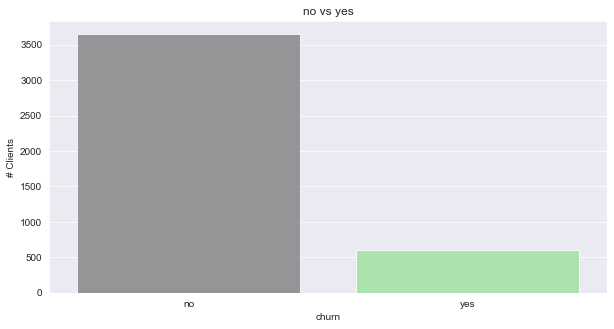

In [10]:
# default count
print('Target Variable')
print(dataset.groupby(['churn'])['churn'].count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(dataset['churn'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('no vs yes')
plt.ylabel('# Clients')
plt.show()

#### Note: Dataset is not balanced, there are 3652 instances which stayed as customers, and 598 which "churned" - have canceled services from this telecom operator.

### Univariate analysis of Categorical Features

#### Analysis of unique values

In [11]:
cat_col = dataset[cat_columns]
display(cat_col.head(5))

state      area_code international_plan voice_mail_plan churn
0    OH  area_code_415                 no             yes    no
1    NJ  area_code_415                 no              no    no
2    OH  area_code_408                yes              no    no
3    OK  area_code_415                yes              no    no
4    MA  area_code_510                 no             yes    no

In [12]:
for cols in cat_col.columns:
    print(f'Number of unique values for: {cols}= {cat_col[cols].nunique()}')
    print(sorted(cat_col[cols].unique()))
    print('----------------------------')

Number of unique values for: state= 51
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
----------------------------
Number of unique values for: area_code= 3
['area_code_408', 'area_code_415', 'area_code_510']
----------------------------
Number of unique values for: international_plan= 2
['no', 'yes']
----------------------------
Number of unique values for: voice_mail_plan= 2
['no', 'yes']
----------------------------
Number of unique values for: churn= 2
['no', 'yes']
----------------------------


#### Note: Values of all categorical features do not need any adjustments. Categorical features will be encoded after.

#### Note: For categorical features different encoding techniques will be used.

### Bivariate analysis of Categorical Features

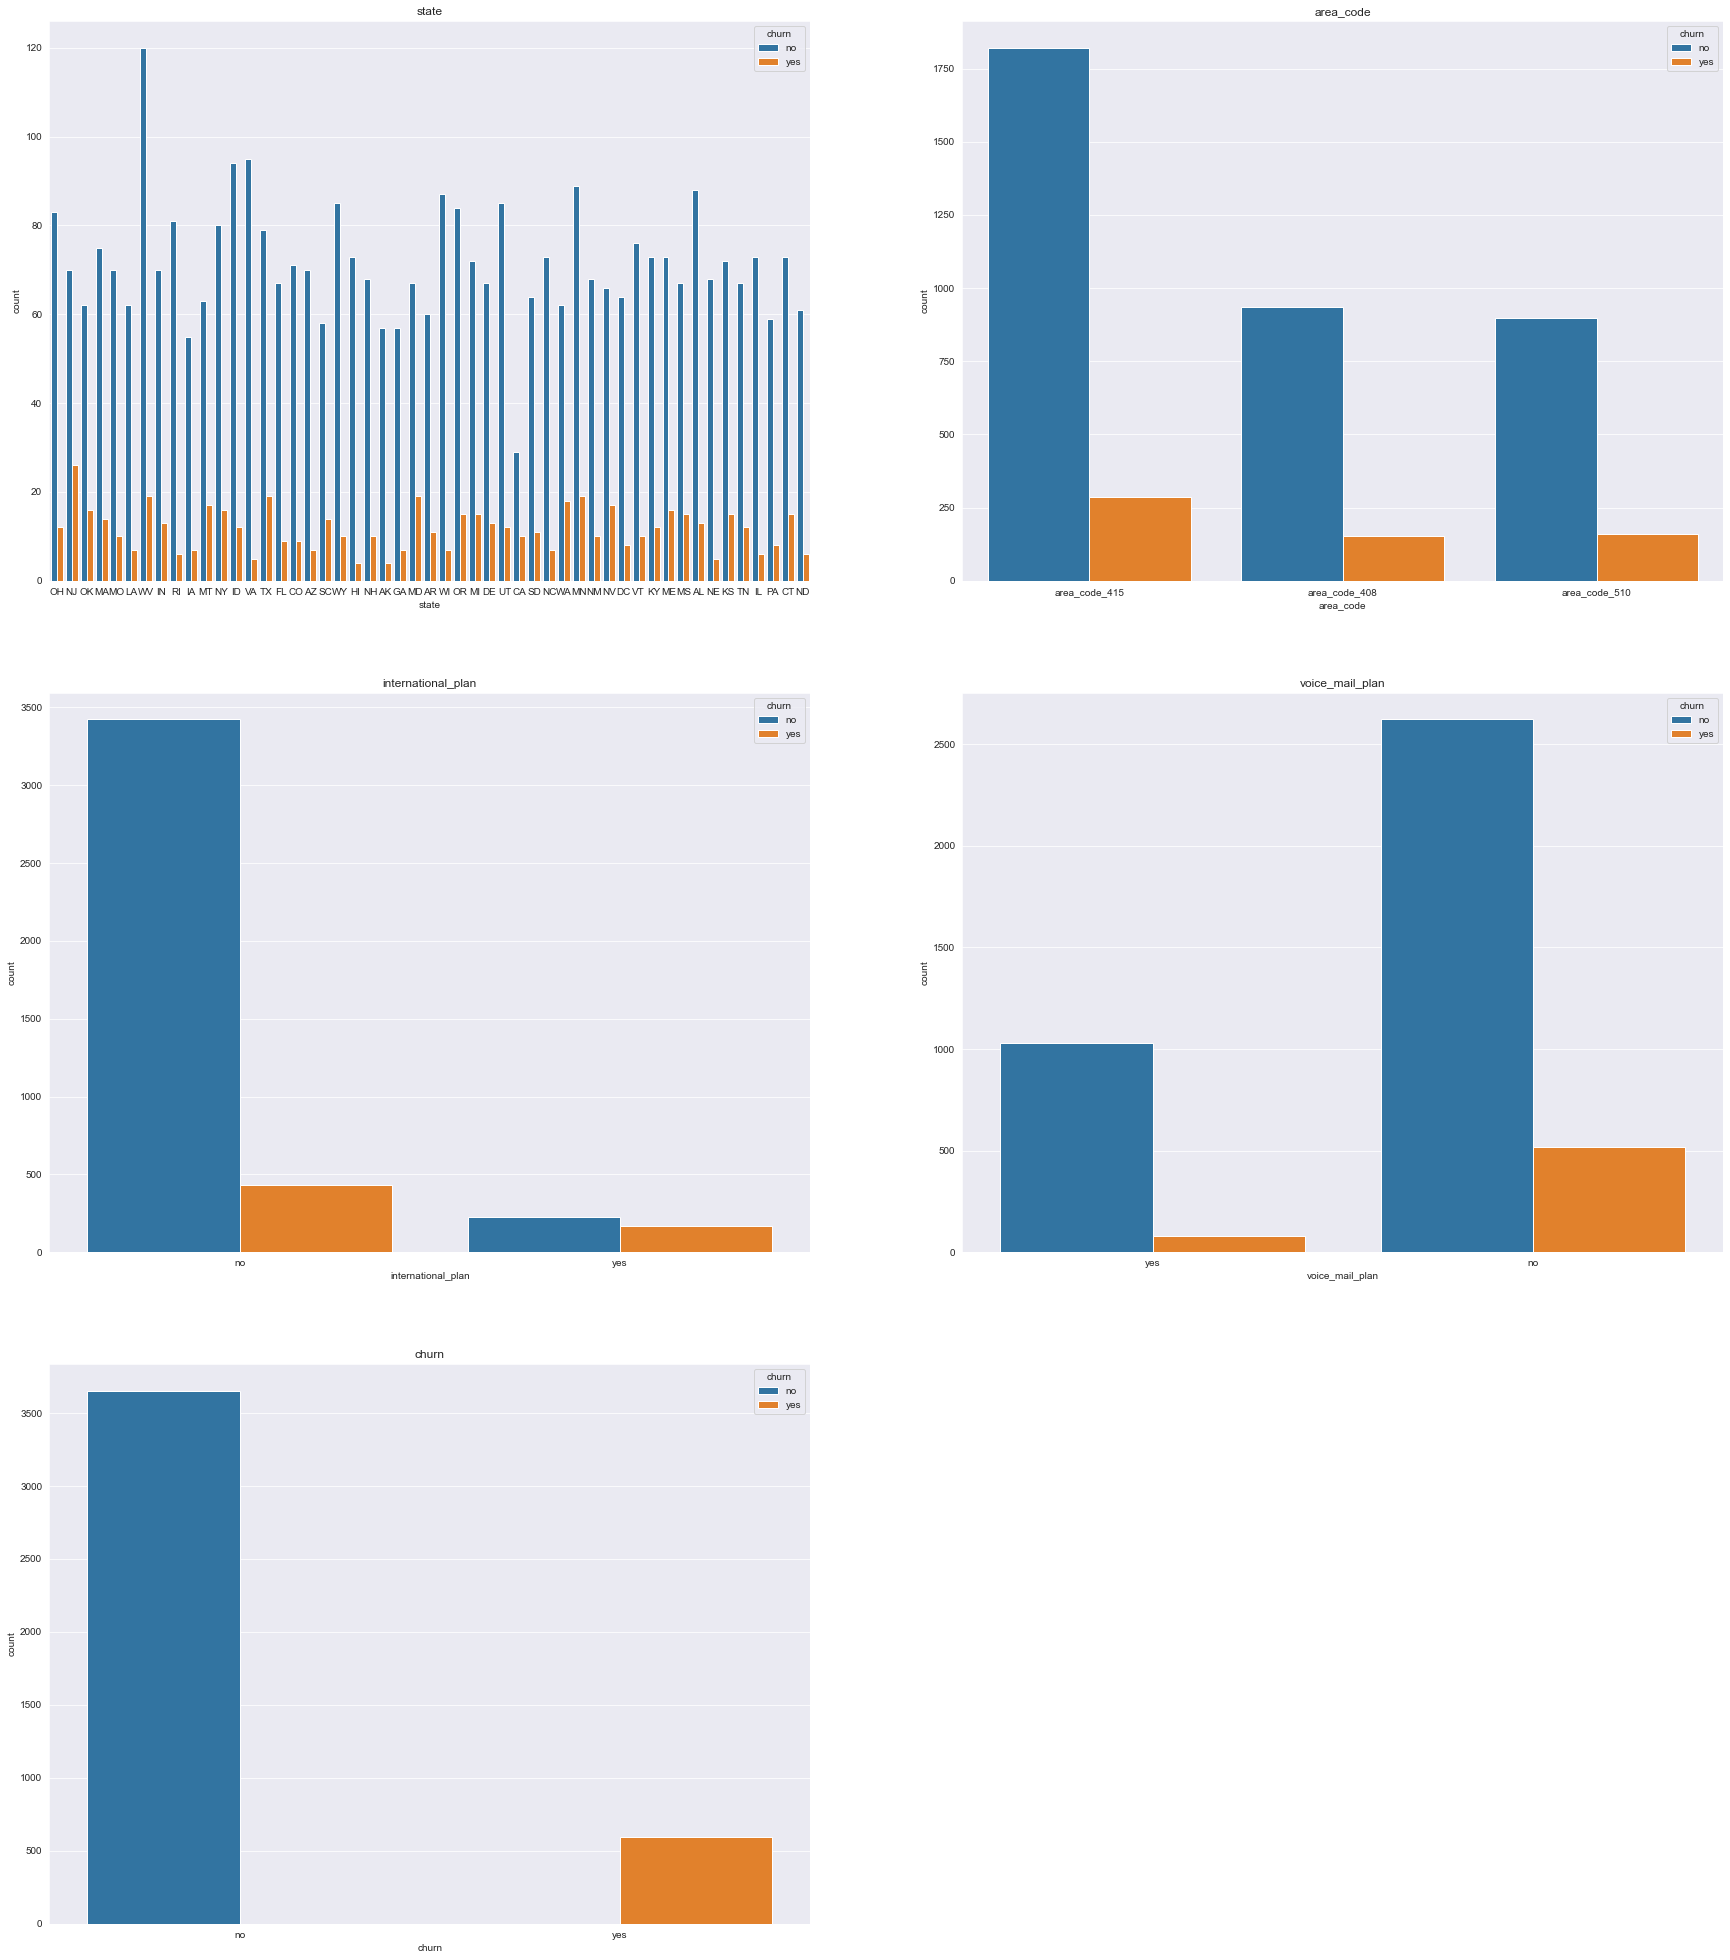

In [13]:
a = 3 #number of rows 
b = 2 #num of columns
c = 1 #init counter

fig = plt.figure(figsize=(30,35))

for feature in dataset[cat_columns]:
    plt.subplot(a, b, c)
    plt.title('{}'.format(feature))
    plt.xlabel(feature)
    sns.countplot(dataset[feature], hue = dataset['churn'])
    c = c+1
    
plt.show()

#### Note: Initial bivariate analysis shows that feature international plan needs to be investigated in more details.

In [14]:
int_plan_yes = dataset[dataset['international_plan'] == 'yes']
int_plan_yes

state  account_length      area_code international_plan voice_mail_plan  \
2       OH              84  area_code_408                yes              no   
3       OK              75  area_code_415                yes              no   
5       MO             147  area_code_415                yes              no   
7       WV             141  area_code_415                yes             yes   
30      AK             136  area_code_415                yes             yes   
...    ...             ...            ...                ...             ...   
4193    WA              62  area_code_415                yes              no   
4203    NH             114  area_code_510                yes             yes   
4213    NM             137  area_code_408                yes              no   
4217    MD              47  area_code_415                yes             yes   
4231    HI              53  area_code_510                yes              no   

      number_vmail_messages  total_day_minutes  total_day_calls  \
2                         0              299.4               71   
3                         0              166.7              113   
5                         0              157.0               79   
7                        37              258.6               84   
30                       33              203.9              106   
...                     ...                ...              ...   
4193                      0              180.9              121   
4203                     28              136.4               93   
4213                      0              312.4              110   
4217                     31              140.6              114   
4231                      0              145.0               80   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
2                50.90               61.9               88              5.26   
3                28.34              148.3              122             12.61   
5                26.69              103.1               94              8.76   
7                43.96              222.0              111             18.87   
30               34.66              187.6               99             15.95   
...                ...                ...              ...               ...   
4193             30.75              134.3              107             11.42   
4203             23.19              170.0               90             14.45   
4213             53.11              231.1               73             19.64   
4217             23.90              264.6               44             22.49   
4231             24.65              228.4               82             19.41   

      total_night_minutes  total_night_calls  total_night_charge  \
2                   196.9                 89                8.86   
3                   186.9                121                8.41   
5                   211.8                 96                9.53   
7                   326.4                 97               14.69   
30                  101.7                107                4.58   
...                   ...                ...                 ...   
4193                179.3                 74                8.07   
4203                191.5                 73                8.62   
4213                120.1                 78                5.40   
4217                238.7                121               10.74   
4231                169.4                109                7.62   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
2                    6.6                 7               1.78   
3                   10.1                 3               2.73   
5                    7.1                 6               1.92   
7                   11.2                 5               3.02   
30                  10.5                 6               2.84   
...                  ...               ...                ...   
4193  

#### Note: 396 customers had international plan included in their tariff model

<AxesSubplot: xlabel='international_plan', ylabel='count'>

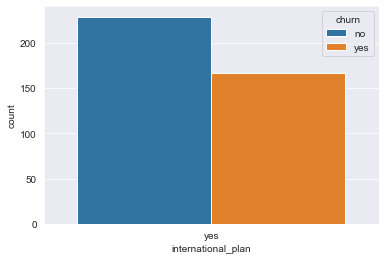

In [15]:
sns.countplot(int_plan_yes['international_plan'], hue = int_plan_yes['churn'])

In [16]:
int_plan_yes_count = int_plan_yes.groupby('churn').count()['state'].reset_index()
int_plan_yes_count.columns = ['churn', 'Count']
#int_plan_yes_count

In [17]:
total = int_plan_yes_count['Count'].sum()
int_plan_yes_count['Prop'] = int_plan_yes_count['Count']/total
int_plan_yes_count

churn  Count      Prop
0    no    229  0.578283
1   yes    167  0.421717

#### Note: 42% of customers which have international plan have "churned" - have canceled services from this telecom operator. This is 229 customers out of total of 396 which had international plan.
### Conclusion: The company needs to review its international plan.

In [18]:
area_code_count = dataset.groupby(['area_code', 'churn']).count()['state'].reset_index()
area_code_count.columns = ['area_code', 'churn', 'Count']
area_code_count

area_code churn  Count
0  area_code_408    no    934
1  area_code_408   yes    152
2  area_code_415    no   1821
3  area_code_415   yes    287
4  area_code_510    no    897
5  area_code_510   yes    159

In [19]:
state_count = dataset.groupby(['state', 'churn']).count()['international_plan'].reset_index()
state_count.columns = ['state', 'churn', 'Count']

In [20]:
state_count.head(5)

state churn  Count
0    AK    no     57
1    AK   yes      4
2    AL    no     88
3    AL   yes     13
4    AR    no     60

In [21]:
(state_count[state_count['churn']=='yes']).sum()

state    AKALARAZCACOCTDCDEFLGAHIIAIDILINKSKYLAMAMDMEMI...
churn    yesyesyesyesyesyesyesyesyesyesyesyesyesyesyesy...
Count                                                  598
dtype: object

In [73]:
state_count['Count'].sum()

4250

In [22]:
state_total = state_count.groupby(['state']).sum()['Count'].reset_index()
state_total = state_total.rename({'Count':'Total_state'}, axis=1)
state_total.head(5)

state  Total_state
0    AK           61
1    AL          101
2    AR           71
3    AZ           77
4    CA           39

In [23]:
state_total.shape

(51, 2)

In [24]:
churn_per_state = state_count[state_count['churn'] == 'yes']

In [25]:
churn_per_state.head(5)

state churn  Count
1    AK   yes      4
3    AL   yes     13
5    AR   yes     11
7    AZ   yes      7
9    CA   yes     10

In [26]:
#df2 = df.rename({'a': 'X', 'b': 'Y'}, axis=1)  # new method

In [27]:
churn_per_state = churn_per_state.rename({'Count':'Churn_per_state'}, axis=1)

In [28]:
churn_per_state.shape

(51, 3)

In [29]:
churn_percent_perstate = pd.merge(state_total,churn_per_state, left_on='state', right_on='state')
churn_percent_perstate.head(5)

state  Total_state churn  Churn_per_state
0    AK           61   yes                4
1    AL          101   yes               13
2    AR           71   yes               11
3    AZ           77   yes                7
4    CA           39   yes               10

In [30]:
churn_percent_perstate['Churn_per_state'].sum()

598

In [31]:
churn_percent_perstate.shape

(51, 4)

In [32]:
churn_percent_perstate['Churn_percent'] = churn_percent_perstate['Churn_per_state']/churn_percent_perstate['Total_state']
churn_percent_perstate.head(5)

state  Total_state churn  Churn_per_state  Churn_percent
0    AK           61   yes                4       0.065574
1    AL          101   yes               13       0.128713
2    AR           71   yes               11       0.154930
3    AZ           77   yes                7       0.090909
4    CA           39   yes               10       0.256410

In [33]:
churn_percent_perstate.drop(['Total_state', 'churn', 'Churn_per_state'], inplace=True, axis='columns')

In [34]:
churn_percent_perstate.head(5)

state  Churn_percent
0    AK       0.065574
1    AL       0.128713
2    AR       0.154930
3    AZ       0.090909
4    CA       0.256410

<AxesSubplot: xlabel='Churn_percent', ylabel='state'>

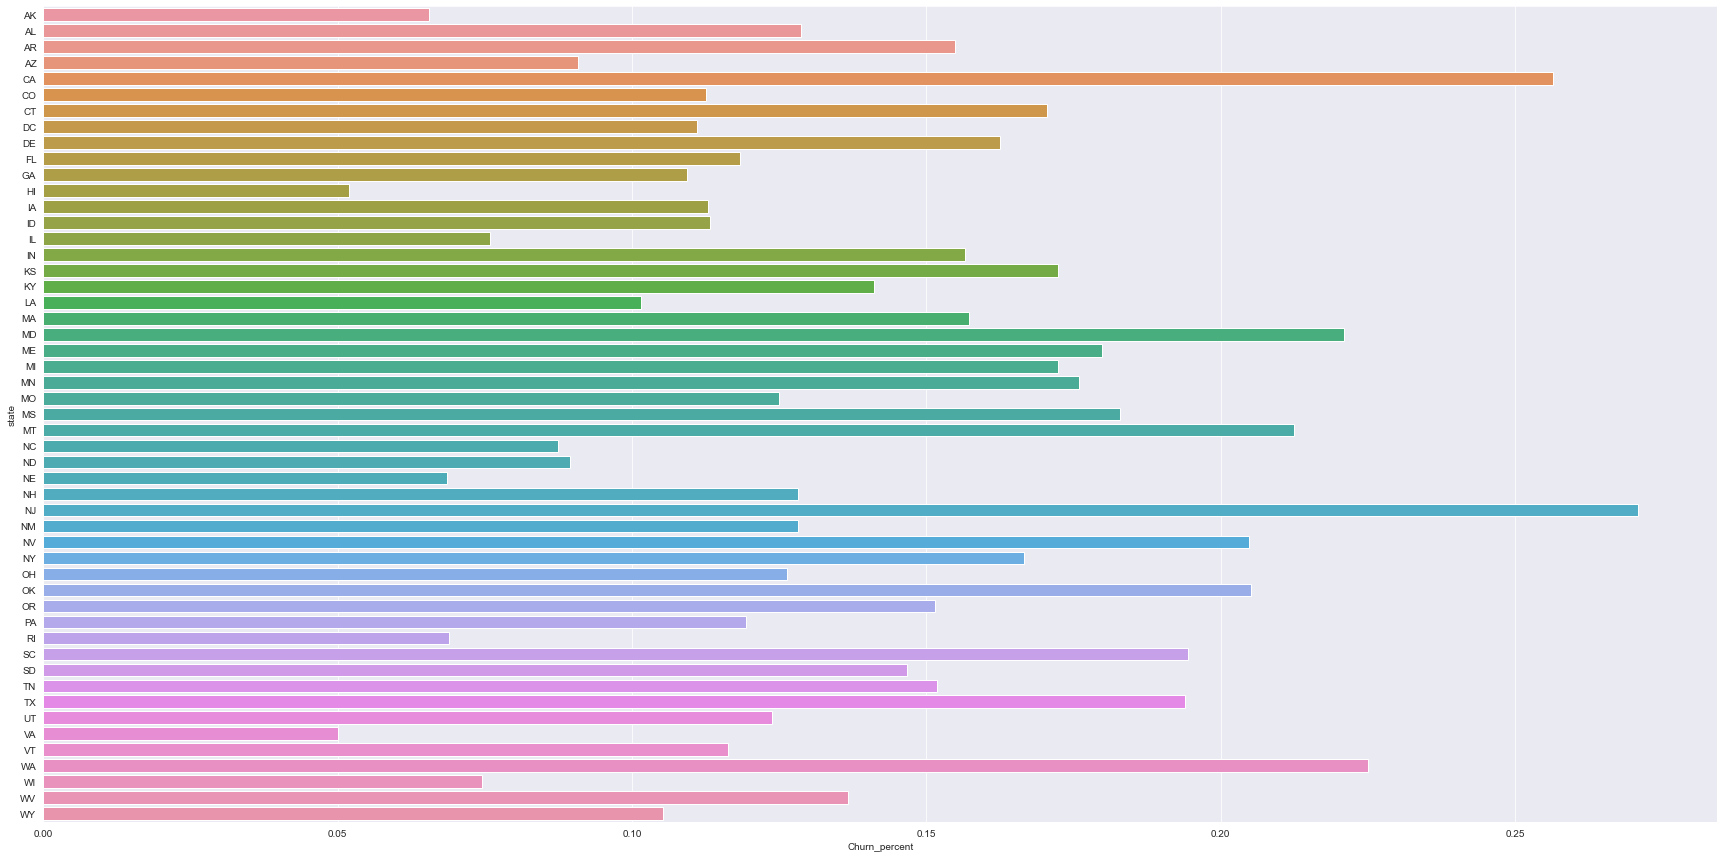

In [35]:
plt.figure(figsize=(30,15))
sns.barplot(data=churn_percent_perstate, x='Churn_percent', y='state')

In [36]:
#data=df.sort_values('Global_Sales').tail(5)

<AxesSubplot: xlabel='Churn_percent', ylabel='state'>

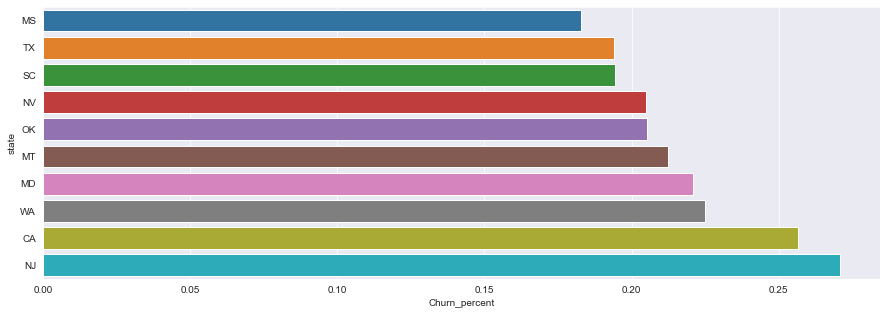

In [74]:
plt.figure(figsize=(15,5))
sns.barplot(data=churn_percent_perstate.sort_values('Churn_percent').tail(10), x='Churn_percent', y='state')

### Conclusion: The company needs to further investigate churn for the 10 states with highest churn shown above. 

### Analysis of Numerical Features

In [38]:
num_columns

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

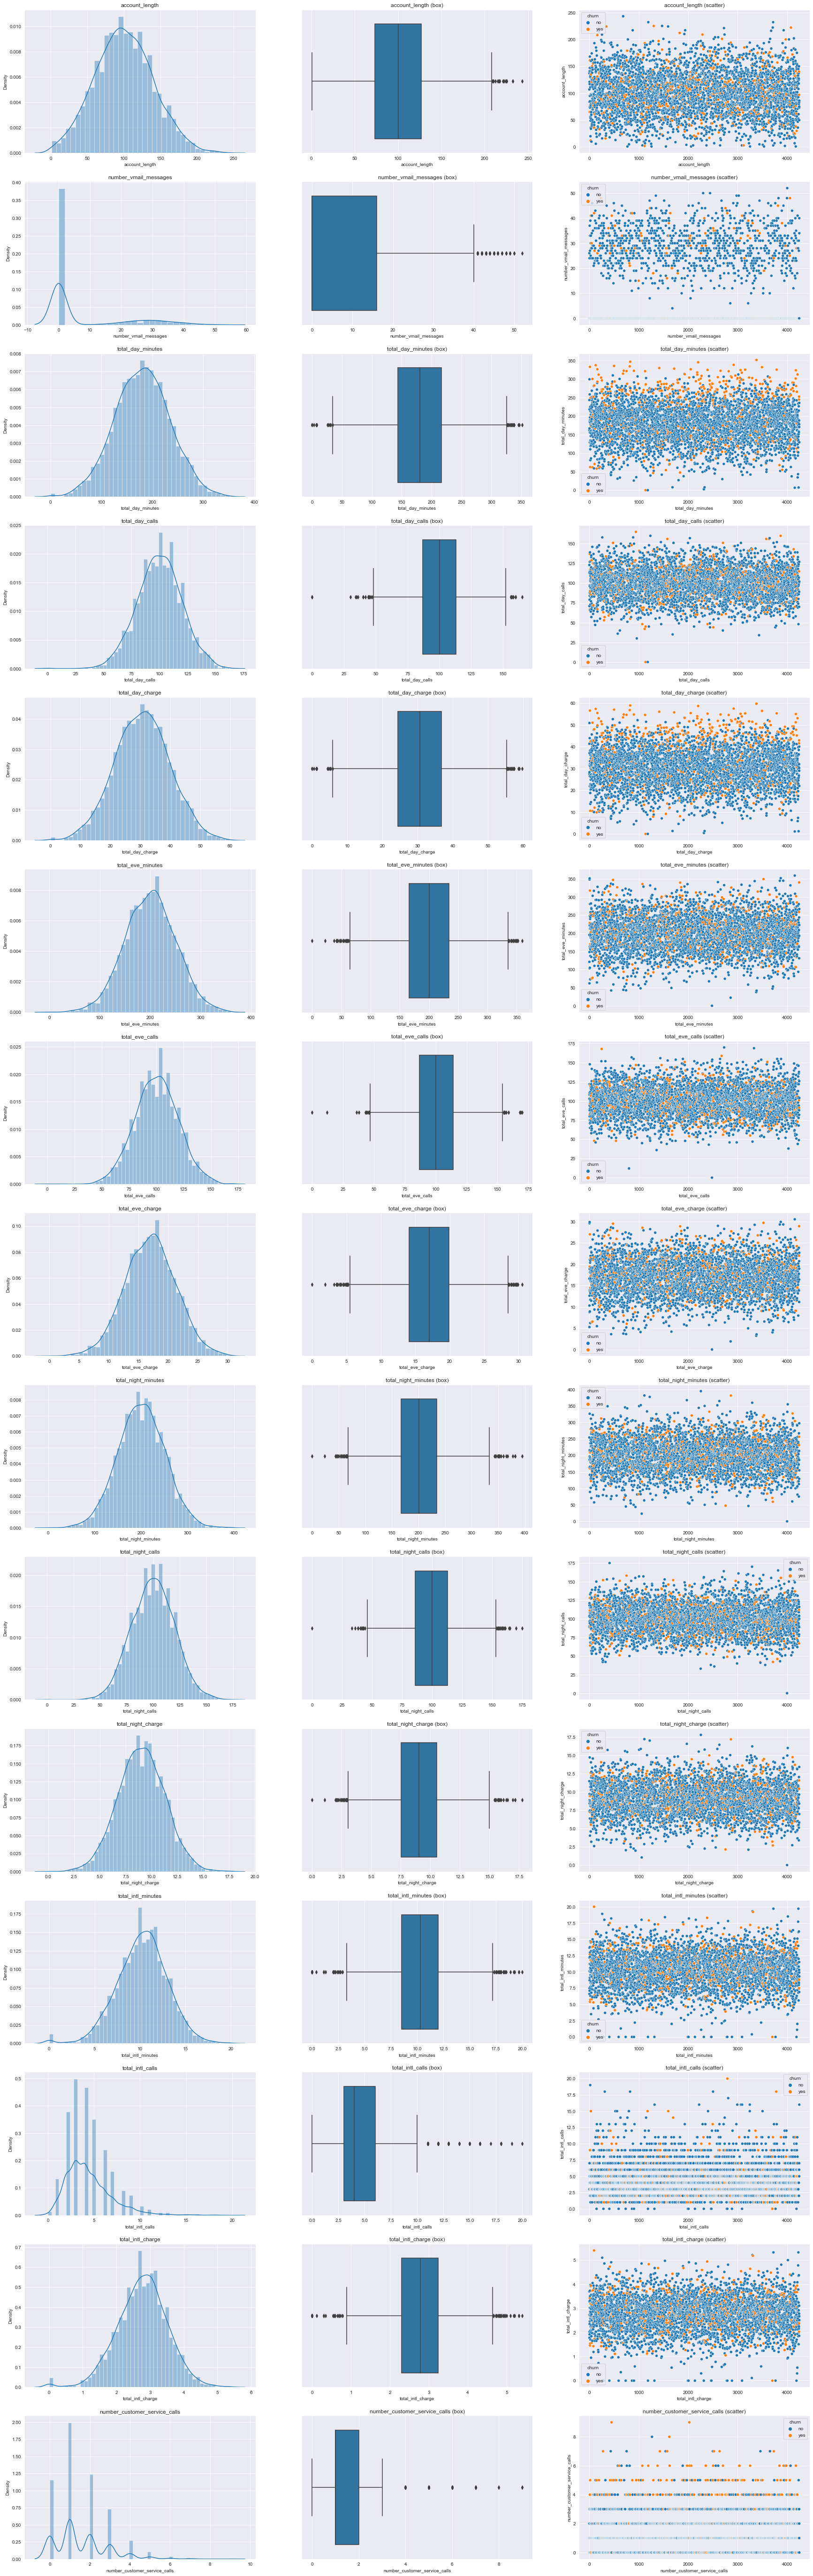

In [39]:
a = 15 #number of rows 
b = 3 #num of columns
c = 1 #init counter

fig = plt.figure(figsize=(30,100))

for feature in dataset[num_columns]:
    plt.subplot(a, b, c)
    plt.title('{}'.format(feature))
    plt.xlabel(feature)
    sns.distplot(dataset[feature], label=feature)
    c = c+1

    plt.subplot(a, b, c)
    plt.title('{} (box)'.format(feature))
    plt.xlabel(feature)
    sns.boxplot(x = dataset[feature])
    c = c+1
    
    plt.subplot(a, b, c)
    plt.title('{} (scatter)'.format(feature))
    plt.xlabel(feature)
    sns.scatterplot(x=dataset.reset_index()['index'] , y = dataset[feature], hue=dataset['churn'])
    c = c+1

#### Scaling numerical features 

In [40]:
minmax_scaler = MinMaxScaler() 
dataset[num_columns] = minmax_scaler.fit_transform(dataset[num_columns].values)
dataset[num_columns]

account_length  number_vmail_messages  total_day_minutes  \
0           0.438017               0.500000           0.459744   
1           0.561983               0.000000           0.692461   
2           0.342975               0.000000           0.851778   
3           0.305785               0.000000           0.474253   
4           0.495868               0.461538           0.620768   
...              ...                    ...                ...   
4245        0.338843               0.000000           0.535704   
4246        0.297521               0.000000           0.506117   
4247        0.305785               0.000000           0.485633   
4248        0.202479               0.769231           0.670555   
4249        0.351240               0.653846           0.368137   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0            0.745455          0.459672           0.544114         0.605882   
1            0.690909          0.692436           0.337323         0.647059   
2            0.430303          0.851740           0.172279         0.517647   
3            0.684848          0.474230           0.412747         0.717647   
4            0.533333          0.620649           0.969942         0.635294   
...               ...               ...                ...              ...   
4245         0.424242          0.535643           0.678542         0.517647   
4246         0.539394          0.506024           0.365154         0.482353   
4247         0.612121          0.485609           0.537434         0.741176   
4248         0.769697          0.670515           0.620651         0.741176   
4249         0.618182          0.368139           0.743390         0.611765   

      total_eve_charge  total_night_minutes  total_night_calls  \
0             0.544204             0.644051           0.588571   
1             0.337263             0.411646           0.594286   
2             0.172233             0.498481           0.508571   
3             0.412901             0.473165           0.691429   
4             0.969876             0.538228           0.674286   
...                ...                  ...                ...   
4245          0.678454             0.541013           0.451429   
4246          0.365095             0.471392           0.508571   
4247          0.537328             0.326835           0.594286   
4248          0.620825             0.753165           0.662857   
4249          0.743287             0.391899           0.571429   

      total_night_charge  total_intl_minutes  total_intl_calls  \
0               0.644344               0.685              0.15   
1               0.411930               0.610              0.25   
2               0.498593               0.330              0.35   
3               0.473270               0.505              0.15   
4               0.538548               0.375              0.35   
...                  ...                 ...               ...   
4245            0.541362               0.515              0.30   
4246            0.471581               0.575              0.30   
4247            0.326956               0.345              0.35   
4248            0.753517               0.495              0.25   
4249            0.392234               0.465              0.80   

      total_intl_charge  number_customer_service_calls  
0              0.685185                       0.111111  
1              0.609259                       0.000000  
2              0.329630                       0.222222  
3              0.505556                       0.333333  
4              0.375926                       0.333333  
...                 ...                            ...  
4245           0.514815                       0.000000  
4246           0.575926                       0.333333  
4247           0.344444                       0.111111  
4248           0.494444                       0.222222  
4249           0.464815                       0.000

In [41]:
dataset

state  account_length      area_code international_plan voice_mail_plan  \
0       OH        0.438017  area_code_415                 no             yes   
1       NJ        0.561983  area_code_415                 no              no   
2       OH        0.342975  area_code_408                yes              no   
3       OK        0.305785  area_code_415                yes              no   
4       MA        0.495868  area_code_510                 no             yes   
...    ...             ...            ...                ...             ...   
4245    MT        0.338843  area_code_415                 no              no   
4246    WV        0.297521  area_code_408                 no              no   
4247    NC        0.305785  area_code_408                 no              no   
4248    HI        0.202479  area_code_408                 no             yes   
4249    VT        0.351240  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                  0.500000           0.459744         0.745455   
1                  0.000000           0.692461         0.690909   
2                  0.000000           0.851778         0.430303   
3                  0.000000           0.474253         0.684848   
4                  0.461538           0.620768         0.533333   
...                     ...                ...              ...   
4245               0.000000           0.535704         0.424242   
4246               0.000000           0.506117         0.539394   
4247               0.000000           0.485633         0.612121   
4248               0.769231           0.670555         0.769697   
4249               0.653846           0.368137         0.618182   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             0.459672           0.544114         0.605882          0.544204   
1             0.692436           0.337323         0.647059          0.337263   
2             0.851740           0.172279         0.517647          0.172233   
3             0.474230           0.412747         0.717647          0.412901   
4             0.620649           0.969942         0.635294          0.969876   
...                ...                ...              ...               ...   
4245          0.535643           0.678542         0.517647          0.678454   
4246          0.506024           0.365154         0.482353          0.365095   
4247          0.485609           0.537434         0.741176          0.537328   
4248          0.670515           0.620651         0.741176          0.620825   
4249          0.368139           0.743390         0.611765          0.743287   

      total_night_minutes  total_night_calls  total_night_charge  \
0                0.644051           0.588571            0.644344   
1                0.411646           0.594286            0.411930   
2                0.498481           0.508571            0.498593   
3                0.473165           0.691429            0.473270   
4                0.538228           0.674286            0.538548   
...                   ...                ...                 ...   
4245             0.541013           0.451429            0.541362   
4246             0.471392           0.508571            0.471581   
4247             0.326835           0.594286            0.326956   
4248             0.753165           0.662857            0.753517   
4249             0.391899           0.571429            0.392234   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                  0.685              0.15           0.685185   
1                  0.610              0.25           0.609259   
2                  0.330              0.35           0.329630   
3                  0.505              0.15           0.505556   
4                  0.375              0.35           0.375926   
...                  ...               ...                ...   
4245  

#### Encoding categorical features

##### Label encoding feature "state" and "churn".

In [42]:
print(sorted(dataset['state'].unique()))
dataset['state'].nunique()

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


51

In [43]:
new_column = dataset['state'].astype('category') # convert column in category variable
new_column = new_column.cat.codes
dataset = dataset.assign(state_Labelled=new_column)

In [44]:
print(sorted(dataset['state_Labelled'].unique()))
dataset['state_Labelled'].nunique()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


51

In [45]:
dataset
dataset.shape

(4250, 21)

In [46]:
dataset.drop(['state'], inplace=True, axis='columns')

In [47]:
dataset
dataset.shape

(4250, 20)

In [48]:
print(sorted(dataset['churn'].unique()))

['no', 'yes']


In [49]:
new_column = dataset['churn'].astype('category') # convert column in category variable
new_column = new_column.cat.codes
dataset = dataset.assign(churn_Labelled=new_column)

In [50]:
print(sorted(dataset['churn_Labelled'].unique()))

[0, 1]


In [51]:
dataset
dataset.shape

(4250, 21)

In [52]:
dataset.drop(['churn'], inplace=True, axis='columns')

In [53]:
dataset
dataset.shape

(4250, 20)

#### Note: Target feature is now called "churn_Labelled".

##### One hot encoding features "area_code", "international_plan" and "voice_mail_plan"

In [54]:
def one_hot_encoding(dataset, columns):
    ds_new = dataset.copy()
    data_dummies =  pd.get_dummies(dataset[columns])
    dataset_new = pd.concat([ds_new, data_dummies],  axis='columns')
    dataset_new.drop(columns, axis='columns', inplace=True)

    return dataset_new

In [55]:
dataset_one_hot = one_hot_encoding(dataset,['area_code','international_plan','voice_mail_plan'])
dataset_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   float64
 1   number_vmail_messages          4250 non-null   float64
 2   total_day_minutes              4250 non-null   float64
 3   total_day_calls                4250 non-null   float64
 4   total_day_charge               4250 non-null   float64
 5   total_eve_minutes              4250 non-null   float64
 6   total_eve_calls                4250 non-null   float64
 7   total_eve_charge               4250 non-null   float64
 8   total_night_minutes            4250 non-null   float64
 9   total_night_calls              4250 non-null   float64
 10  total_night_charge             4250 non-null   float64
 11  total_intl_minutes             4250 non-null   float64
 12  total_intl_calls               4250 non-null   f

In [56]:
dataset2 = dataset_one_hot

In [57]:
dataset2

account_length  number_vmail_messages  total_day_minutes  \
0           0.438017               0.500000           0.459744   
1           0.561983               0.000000           0.692461   
2           0.342975               0.000000           0.851778   
3           0.305785               0.000000           0.474253   
4           0.495868               0.461538           0.620768   
...              ...                    ...                ...   
4245        0.338843               0.000000           0.535704   
4246        0.297521               0.000000           0.506117   
4247        0.305785               0.000000           0.485633   
4248        0.202479               0.769231           0.670555   
4249        0.351240               0.653846           0.368137   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0            0.745455          0.459672           0.544114         0.605882   
1            0.690909          0.692436           0.337323         0.647059   
2            0.430303          0.851740           0.172279         0.517647   
3            0.684848          0.474230           0.412747         0.717647   
4            0.533333          0.620649           0.969942         0.635294   
...               ...               ...                ...              ...   
4245         0.424242          0.535643           0.678542         0.517647   
4246         0.539394          0.506024           0.365154         0.482353   
4247         0.612121          0.485609           0.537434         0.741176   
4248         0.769697          0.670515           0.620651         0.741176   
4249         0.618182          0.368139           0.743390         0.611765   

      total_eve_charge  total_night_minutes  total_night_calls  ...  \
0             0.544204             0.644051           0.588571  ...   
1             0.337263             0.411646           0.594286  ...   
2             0.172233             0.498481           0.508571  ...   
3             0.412901             0.473165           0.691429  ...   
4             0.969876             0.538228           0.674286  ...   
...                ...                  ...                ...  ...   
4245          0.678454             0.541013           0.451429  ...   
4246          0.365095             0.471392           0.508571  ...   
4247          0.537328             0.326835           0.594286  ...   
4248          0.620825             0.753165           0.662857  ...   
4249          0.743287             0.391899           0.571429  ...   

      number_customer_service_calls  state_Labelled  churn_Labelled  \
0                          0.111111              35               0   
1                          0.000000              31               0   
2                          0.222222              35               0   
3                          0.333333              36               0   
4                          0.333333              19               0   
...                             ...             ...             ...   
4245                       0.000000              26               0   
4246                       0.333333              49               0   
4247                       0.111111              27               0   
4248                       0.222222              11               0   
4249                       0.000000              46               0   

      area_code_area_code_408  area_code_area_code_415  \
0                           0                        1   
1                           0                        1   
2                           1                        0   
3                           0                        1   
4                           0                        0   
...                       ...                      ...   
4245                        0                        1   
4246                        1                        0   
4247                        1       

#### Testing model 

In [58]:
X = dataset2.drop(columns='churn_Labelled')
y = dataset2['churn_Labelled']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.3, random_state = 0)

#### Naive Bayes

In [60]:
GNB_clf = GaussianNB().fit(X_train,y_train)
y_pred_GNB = GNB_clf.predict(X_test)

GNB_score = accuracy_score(y_test,y_pred_GNB)
print('Accuracy score Naive Bayes - baseline model:', GNB_score)

Accuracy score Naive Bayes - baseline model: 0.876078431372549


#### Random Forest

In [66]:
rf_clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred_rf=rf_clf.predict(X_test)

rf_score = accuracy_score(y_test,y_pred_rf)
print('Accuracy score Random Forest :', rf_score)

Accuracy score Random Forest : 0.9670588235294117


#### Decision tree 

In [62]:
acc_tree = []
for i in range(1, 11):
    tree_clf = tree.DecisionTreeClassifier(max_depth = i, random_state = 0)
    tree_clf = tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    tree_score = accuracy_score(y_test, y_pred)
    acc_tree.append(tree_score)
    
max_acc_tree = np.max(acc_tree)  

max_dep = acc_tree.index(max_acc_tree) + 1
#print(max_dep)

print(f'The optimal parameter value for max_depth for Decision tree classifier is {max_dep} and shows maximum accuracy of {max_acc_tree}')
#acc_tree

The optimal parameter value for max_depth for Decision tree classifier is 7 and shows maximum accuracy of 0.9545098039215686


#### KNN

In [63]:
acc_knn = []
for i in range(1, 51):
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf = knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    knn_score = accuracy_score(y_test, y_pred)
    acc_knn.append(knn_score)

max_acc_knn = np.max(acc_knn)  

max_neigh = acc_knn.index(max_acc_knn) + 1
#print(max_neigh)

print(f'The optimal parameters for n_neighbors with KNN classifier are {max_neigh} and they show maximum accuracy of {max_acc_knn}')
#acc_knn

The optimal parameters for n_neighbors with KNN classifier are 31 and they show maximum accuracy of 0.8650980392156863


#### AdaBoost

In [64]:
adaboost_clf = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
y_pred_adaboost = adaboost_clf.predict(X_test)

adaboost_score = accuracy_score(y_test,y_pred_adaboost)
print('Accuracy score AdaBoost :', adaboost_score)

Accuracy score AdaBoost : 0.8917647058823529


#### Conclusion: Random Forest Classifier shows best results, and is the only default model which shows results above 0.90 as requested. We can try to improve results of Random Forest by tuning hyper parameters, or use different cross validation technique.

#### Precision/recall evaluation

#### Note: Precision/recall evaluation will be made on model with best accuracy score.

In [71]:
print("Accuracy score Random Forest:",rf_score)
print(classification_report(y_test,y_pred_rf))

Accuracy score Random Forest: 0.9670588235294117
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1102
           1       0.97      0.78      0.87       173

    accuracy                           0.97      1275
   macro avg       0.97      0.89      0.92      1275
weighted avg       0.97      0.97      0.97      1275



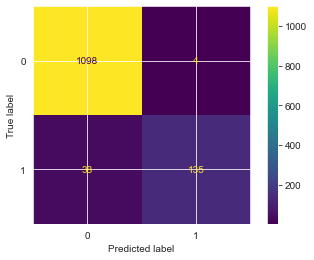

In [72]:
plot_confusion_matrix(rf_clf,
                     X_test,
                     y_test)

#### Note: F1 score is satisfactory close to the accuracy score. False negative predictions can be lowered.